© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/phd_students/seleznova/index.html) 2022

https://github.com/mselezniova/MSML22

Distributed under the [Creative Commons Attribution License](https://creativecommons.org/licenses/by/4.0/)

In [1]:
import os

import numpy as np
import pandas as pd

%pylab inline
%config InlineBackend.figure_format='svg'

Populating the interactive namespace from numpy and matplotlib


# Generalized linear models

So far we have only worked with simple linear classification/regression models, which minimized squared loss:

$$\min_{w,b} \dfrac{1}{2N}\sum_{i=1}^N (h_{w,b}(x_i)-y_i)^2 +\lambda \mathcal{P}(w),$$

where $h_{w,b} = \langle x, w \rangle + b$ and $\mathcal{P}$ is the regularization term with hyperparamter $\lambda$.


**Generalized Linear Models (GLM)** extend such linear models by:

- **(Non-linear) activation function:** a hypothesis of a GLM is given by $h(x) = \alpha \bigl(\langle x, w\rangle +b \bigr)$, where $\alpha(\cdot)$ is some (typically non-linear) activation function.
- **Loss function:** Instead of MSE, GLMs can use different loss functions $\mathcal{L}$ to compute the risk:

$$\min_{w,b} \dfrac{1}{N}\sum_{i=1}^N \mathcal{L}(h(x_i),y_i) + \lambda \mathcal{P}(w),$$

In this class, we consider one of the most well-known GLMs.

# Logistic Regression

Logistic regression is a GLM for **binary classification**, which uses **sigmoid function** as the activation function $\alpha$:

$$\alpha(t) = \dfrac{1}{1+e^{-t}}$$

Let us plot the sigmoid function:

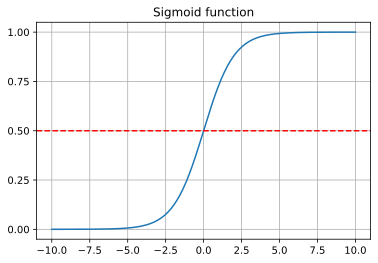

In [2]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

x = np.linspace(-10,10,200)

plt.plot(x, sigmoid(x))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.yticks([0,0.25,0.5,0.75,1])

plt.title('Sigmoid function')
plt.grid()

One can see that outputs of the logistic regression model lie between zero and one:
$$h(x) \in [0,1]$$ 
Therefore, the proper choice of class labels for binary classification is $$Y \in \{0,1\}$$ (instead of labels $+1$ and $-1$ that we used before). As we will see later, this choice of labels can also be interpreted as predicting presence or absense of one signle property (i.e. "Does a patient have a disease?", "Will the company go bankrupt?", etc.)

Logistic regression uses **cross-entropy loss**, given by:
$$\mathcal{R}(y,y') = - y\log(y') - (1-y)\log(1-y')$$

Note that this loss expression also only makes sense for $(0,1)$-labels: 

$$ \mathcal{R}(y,\hat{y}) = \begin{cases}
        -\log(y') \text{ if $y=1$,}
        \\
        - \log(1-y') \text{ if $y=0$}.
        \end{cases}
$$        
        

Putting everything together, we can write the optimization problem of logistic regression as follows:

$$\min_{w, b} \dfrac{1}{N} \sum_{i=1}^N y_i\log(1 + e^{-(\langle x_i, w\rangle +b )}) + 
(1-y_i )\log(1 + e^{(\langle x_i, w\rangle +b )}) + \lambda \mathcal{P}(w,b)$$


## Motivation: Maximal Likelihood Estimation (MLE)

Maximal Likelihood Estimation (MLE) is a common method to estimate unknown parameters of a distribution from data. Assume we have a dataset $X=(x_i)_{i=1}^N, Y=(y_i)_{i=1}^N$ and the joint distribution of $(x_i,y_i)$ is parametrized by $w$. The **likelihood** function gives the probability of the dataset labels being generated from a distribution with parameters $w$:

$$\mathcal{L}(w|X) = \prod_{i=1}^N P(Y=y_i|X,w)$$

Thus, MLE returns parameters that generate the given dataset with the highest probability. 

Since it often challenging to optimize the product, the **log-likelihood** is maximized instead:

$$\log \mathcal{L}(w|X) = \sum_{i=1}^N \log P(Y=y_i|X,w)$$

One can see that maximizin log-likelihood is equivalent to maximizing likelihood, since logarithm is monotonous:

$$\underset{w}{\operatorname{argmax}}\mathcal{L}(w|X) \Leftrightarrow \underset{w}{\operatorname{argmax}}\log\mathcal{L}(w|X)$$

### Linear Regression:

- Assumes $Y \sim \mathcal{N}(Xw, \sigma_w^2 \mathbb{I})$:
$$P(Y=y_i|X,w) = \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\Bigl(-\dfrac{(y_i-\langle x_i, w \rangle)^2}{2\sigma^2}\Bigr) \propto \exp\Bigl(-\bigl(y_i-\langle x_i, w \rangle\bigr)^2\Bigr) = \exp\Bigl(-R_{MSE}(y_i,h(x_i))\Bigr)$$

- Therefore, maximizing log-likelihood for linear regression is equivalent to minimizing MSE loss:
$$\underset{w}{\operatorname{argmax}} \log \mathcal{L}(w|X) \Leftrightarrow 
\underset{w}{\operatorname{argmax}} - \sum_{i=1}^N \bigl(y_i-\langle x_i, w \rangle\bigr)^2 \Leftrightarrow 
\underset{w}{\operatorname{argmin}} \sum_{i=1}^N \bigl(y_i-\langle x_i, w \rangle\bigr)^2 \Leftrightarrow 
\underset{w}{\operatorname{argmin}} \|Xw - Y\|_2^2$$

- Linear regression outputs **real values**, which predict the value of $y$.


### Logistic Regression:

- Assumes $Y \sim Ber(h(X))$:
 
$$P(Y=y_i|X,w) = h(x_i)^{y_i} (1-h(x_i))^{1-y_i} \Rightarrow \log P(Y=y_i|X,w) = y_i \log h(x_i) + (1-y_i)\log (1-h(x_i))  = - R_{CE}(y_i, h(x_i))$$

- Therefore, maximizing log-likelihood is equivalent to minimizing cross-entropy loss:
$$\underset{w}{\operatorname{argmax}} \log \mathcal{L}(w|X) \Leftrightarrow 
\underset{w}{\operatorname{argmax}} \sum_{i=1}^N  y_i \log h(x_i) + (1-y_i)\log (1-h(x_i)) \Leftrightarrow 
\underset{w}{\operatorname{argmin}} \sum_{i=1}^N  -y_i \log h(x_i) - (1-y_i)\log (1-h(x_i)) $$

- Logistic regression outputs the **probability** that $y=1$ for a given input:
$$h(x) = P(Y=1 | X=x, w) \in [0,1]$$

## How to choose the activation function?

- The **range** of $\alpha: \mathbb{R} \to \mathbb{R}$ has to make sense for the assumed distribution. In GLMs, we assume that the model's output predicts the expectation of $Y$ on a given input: $$h(x) = \alpha (\langle w, x \rangle + b) = \mathbb{E}[Y|X=x, w, b]$$ Therefore, the rangle of $\alpha$ has to be $[0,1]$ for Binomial distribtuon (cross-entropy loss) but can be $[-\infty,+\infty]$ for Gaussian distribution (quadratic loss).
- Typically, $\alpha$ is chosen to be **invertible** and **differentiable** so that GD optimization works well.
- Idially, the activation should account for the structure of the data (can the data be approximated by a line? or rather e.g. an exponential function?).
- The loss function and the activation function should "match" each other to avoid **exploding/vanishing gradients**. Consider gradient of a GLM's loss with a certain activation function: $$\nabla_w \mathcal{L}(y,h(x)) = \dfrac{\partial \mathcal{L}}{\partial h(x)} \alpha ' (\langle x, w \rangle) x$$ We see that the gradient depends on $\alpha '$ and on $\partial_h \mathcal{L}$. Consider cross-entropy loss and linear activation (i.e. $\alpha(x) = x$), then we have:
$$\dfrac{\partial \mathcal{L}}{\partial h(x)} = -\dfrac{y - h(x)}{h(x)(1-h(x))} \to \infty \text{ if } h(x)\to 0 \text{ or }  h(x)\to 1$$ Therefore, the gradients are likely to explode in such a model. However, for sigmoid activation we have 
$$\alpha ' (h) = h (1 - h),$$
which counteracts the denominator of the loss derivative.

# Logistic regression on breast cancer Wisconsin (diagnostic) dataset

We will test logistic regression on [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The goal is to predict whether the patient's tumor is malignant based on characteristics of the cell nuclei. The dataset contains the following columns:

1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

In [3]:
file_name = 'breast_cancer.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
column_names = ['id','Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
               'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, index_col=0)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, names=column_names)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `breast_cancer.csv`...


In [4]:
df['Class'] = df['Class'].replace([2,4],[0,1])

In [5]:
df = df[df['Bare Nuclei']!='?'].astype(float) #remove lines with missing values
df

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,1.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,1.0


In [6]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    '''
    Split all available data into a training and test data set.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame of available data.
    training_data_fraction : float
        The fraction of the data that should be used for training.
        E.g., `training_data_fraction=0.6` means 60%.
    shuffle : bool , optional
        If True, randomly reshuffles the data before the split.
    '''
    
    if shuffle is True:
        df_ = df.sample(frac=1).reset_index(drop=True)
    else:
        df_= df
    
    train_df = df_.iloc[:round(training_data_fraction*len(df_)),:]
    test_df = df_.iloc[round(training_data_fraction*len(df_)):,:]
    
    return df_, train_df, test_df

In [7]:
training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

# convert DataFrame entries to Numpy arrays
# `X, Y`: all data
# `train_X, train_Y`: training data
# `test_X, test_Y`: training data

X = df.iloc[:,1:-1].to_numpy()
Y = df['Class'].to_numpy()

train_X = train_df.iloc[:, 1:-1].to_numpy()
train_Y = train_df['Class'].to_numpy()

test_X = test_df.iloc[:, 1:-1].to_numpy()
test_Y = test_df['Class'].to_numpy()

print('Training data split as follows:')
print(f'  Training data samples: {len(train_df)}')
print(f'      Test data samples: {len(test_df)}')

Training data split as follows:
  Training data samples: 546
      Test data samples: 137


Recall the logistic regression minimization problem (for now without regularization):

$$\min_{w, b} \dfrac{1}{N} \sum_{i=1}^N - y_i\log(\alpha(\langle x_i, w \rangle + b)) - 
(1-y_i )\log(1-\alpha(\langle x_i, w \rangle + b)) + \lambda \mathcal{P}(w,b)$$

The gradients of this loss function are given by:


$$\nabla_w \hat{\mathcal{R}}(w,b,X,Y) = \dfrac{1}{N}\sum_{i=1}^N \bigl(\alpha(\langle x_i, w \rangle + b) - y_i\bigr) x_i = \dfrac{1}{N} X^T (\alpha(Xw + b) - Y)$$

$$\nabla_b \hat{\mathcal{R}}(w,b,X,Y) = \dfrac{1}{N}\sum_{i=1}^N \bigl(\alpha(\langle x_i, w \rangle + b) - y_i\bigr) = \dfrac{1}{N} \mathbb{1}_N^T (\alpha(Xw + b) - Y)$$


In [8]:
class sigmoid:
    def val(x):
        return 1./(1.+np.exp(-x))
    def grad(x):
        a = 1./(1.+np.exp(-x))
        return a*(1.-a)

class LinearBinaryClassification:

    def __init__(self, w, b):
        self._w = np.array(w, dtype=np.float)
        self._b = np.array(b, dtype=np.float)
        self.history = [{'w': self._w.copy(),
                         'b': self._b.copy(),
                         'loss': None,
                         'accuracy': None}]
        
    def h(self, x):
        return np.where(x @ self._w + self._b >= 0.0, 1, -1)
    
    def accuracy(self, X, Y):
        return 1. - np.sum(self.h(X) != Y)/Y.size
    
    def loss(self, X, Y):
        lin_term = X@self._w + self._b*np.ones(X.shape[0]) - Y
        return 0.5/X.shape[0]*np.dot(lin_term,lin_term)
    
    def loss_grad(self, X,Y):
        lin_term = X@self._w + self._b*np.ones(X.shape[0]) - Y
        return X.T@(lin_term)/X.shape[0], np.mean(lin_term, axis=0)
    
    def train(self, X, Y, lr = 1e-3, num_iter = 100):

        self.history[0]['loss'] = self.loss(X,Y)
        self.history[0]['accuracy'] = self.accuracy(X,Y)
        
        for e in range(num_iter):
            
            grad_w, grad_b = self.loss_grad(X,Y)
            self._w -= lr*grad_w
            self._b -= lr*grad_b
            
            self.history.append({'w': self._w.copy(),
                                 'b': self._b.copy(),
                                 'loss': self.loss(X,Y),
                                 'accuracy': self.accuracy(X,Y)})
            
        return self._w, self._b
    

class LogisticRegression(LinearBinaryClassification):
    
    def __init__(self, w, b):
        self._w = np.array(w, dtype=np.float)
        self._b = np.array(b, dtype=np.float)
        self.history = [{'w': self._w.copy(),
                         'b': self._b.copy(),
                         'loss': None,
                         'accuracy': None}]
        
        self.activation = sigmoid
        
    def h(self,x):
        return self.activation.val(x @ self._w + self._b)
    
    def accuracy(self,X,Y):
        pred = np.where(self.h(X) >= 0.5, 1, 0)
        return 1. - np.sum(pred != Y)/Y.size
    
    def loss(self,X,Y):
        lin_term = X @ self._w + self._b
        return -np.mean(Y*np.log(self.activation.val(lin_term))+
                       (1.-Y)*np.log(1.-self.activation.val(lin_term)) )
    
    def loss_grad(self,X,Y):
        lin_term = self.activation.val(X@self._w+self._b) - Y
        return  X.T@lin_term/X.shape[0], np.mean(lin_term, axis=0)

In [9]:
w = [0]*X.shape[1]
b = 0

model = LogisticRegression(w, b)
model.train(train_X,train_Y,lr = 1e-2, num_iter = 100000)

(array([ 0.45808167, -0.10066065,  0.30799923,  0.32946598,  0.23676393,
         0.4292005 ,  0.35531188,  0.18189732,  0.43913578]),
 array(-9.16429969))

The final train accuracy: 97.3%
Test accuracy: 97.1%


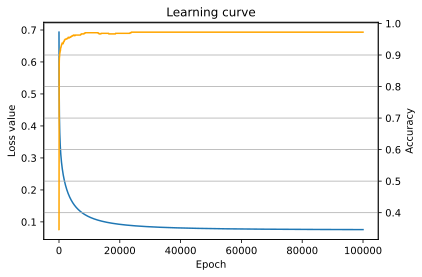

In [10]:
fig, ax = plt.subplots()

loss_history = [h['loss'] for h in model.history]
acc_history = [h['accuracy'] for h in model.history]

ax.plot(range(len(model.history)), loss_history)
ax.set_ylabel('Loss value')

ax2 = ax.twinx()
ax2.plot(range(len(model.history)), acc_history, color='orange')
ax2.set_ylabel('Accuracy')

ax.set_xlabel('Epoch')

plt.title('Learning curve')
plt.grid()

print(f'The final train accuracy: {round(100*acc_history[-1],1)}%')
print(f'Test accuracy: {round(100*model.accuracy(test_X, test_Y),1)}%')

## Linear Regression

For comparison, let us try to solve the same problem with linear regression.

In [15]:
w = [0]*X.shape[1]
b = 0

model = LinearBinaryClassification(w, b)
model.train(train_X,np.where(train_Y>0.5,1,-1),lr = 1e-2, num_iter = 100000)

(array([0.06545287, 0.03991885, 0.03577239, 0.01504072, 0.02662041,
        0.09123099, 0.03242528, 0.03537202, 0.00443584]),
 array(-1.4993415))

The final accuracy: 96.2%
Test accuracy: 96.4%


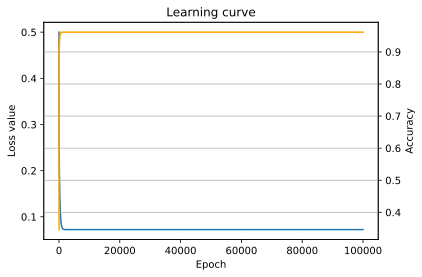

In [16]:
fig, ax = plt.subplots()

loss_history = [h['loss'] for h in model.history]
acc_history = [h['accuracy'] for h in model.history]

ax.plot(range(len(model.history)), loss_history)
ax.set_ylabel('Loss value')

ax2 = ax.twinx()
ax2.plot(range(len(model.history)), acc_history, color='orange')
ax2.set_ylabel('Accuracy')

ax.set_xlabel('Epoch')

plt.title('Learning curve')
plt.grid()

print(f'The final accuracy: {round(100*acc_history[-1],1)}%')
print(f'Test accuracy: {round(100*model.accuracy(test_X, np.where(test_Y>0.5,1,-1)),1)}%')

## Cross-validation

In [17]:
def k_fold_split(X,Y,k):
    perm_ind = np.random.permutation(np.arange(X.shape[0]))
    return np.array_split(X[perm_ind],k), np.array_split(Y[perm_ind],k)

In [18]:
X_cv, Y_cv = k_fold_split(X,Y,k=5)

In [19]:
acc_logreg = []
acc_linreg = []

for i in range(len(X_cv)):
    x_train = np.concatenate(X_cv[:i] + X_cv[i+1:])
    y_train = np.concatenate(Y_cv[:i] + Y_cv[i+1:])
    x_test = X_cv[i]
    y_test = Y_cv[i]
    
    w = [0]*X.shape[1]
    b = 0
    
    model = LogisticRegression(w, b)
    model.train(x_train,y_train, lr = 1e-2, num_iter = 100000)

    acc_logreg.append(model.accuracy(x_test,y_test))
    
    model = LinearBinaryClassification(w, b)
    model.train(x_train,np.where(y_train>0.5,1,-1), lr = 1e-2, num_iter = 100000)

    acc_linreg.append(model.accuracy(x_test,np.where(y_test>0.5,1,-1)))
    
print(f'CV accuracy Logistic Regression: {np.mean(acc_logreg)}')
print(f'CV accuracy Linear Regression: {np.mean(acc_linreg)}')

CV accuracy Logistic Regression: 0.9648132245598969
CV accuracy Linear Regression: 0.9618720480893087


# Exercise

Add the possibility to use Ridge and Lasso regularization in the LogisticRegression class. You can add argument ```penalty: {‘ridge’, ‘lasso’, 'none'}``` to the class initialization.